<a href="https://colab.research.google.com/github/ri1965/Toolkits/blob/main/Template_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consigna

El ministerio de salud de la nación les solicita realizar un programa que les permita visualizar el estado de ciudadanos infectados con COVID-19 en todas sus variantes en un rango de fecha determinado y comparar esos resultados con los niveles de vacunación.
A su vez, se les solicita que realicen una compración con otro(s) país(es). (Seleccionar como máximo 2 adicionales)

Para ello, un analista le provee los siguientes archivos.

[Vacunación Global](https://raw.githubusercontent.com/al34n1x/DataScience/master/100.Examen/2022/country_vaccinations.csv)

[Casos COVID Global](https://raw.githubusercontent.com/al34n1x/DataScience/master/100.Examen/2022/owid-covid-data.csv)


Consideraciones:

* Rango de Fechas desde 01/01/2021 a 15/01/2021
* Importar los archivos y trabajarlos como diccionarios o dataframes. El caracter delimitador de los archivos es el **';'**
* Realizar al menos 4 charts que representen la información solicitada
* Utilizar funciones
* Generar un archivo que posea la siguiente estructura de datos dscriminado por el rango de fechas.
```
ID:{
'país':value,
'fecha':value,
'nuevos_casos':value,
'nuevas_muertes':value,
'total_vacunados':value
}
```
* Documentar cada paso con bloques de texto adicionalmente a notas en el código
* Presentar por pantalla el total acumulado de infectados y de vacunados en el rango de fechas solicitado
* Proveer una breve conclusión como parte del análisis 





---


# Paso 1: Carga de datos

#### a. Importamos las librerías y los datos de las url aportadas en las consignas del TP 

In [1]:
# Ingrese código aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url_vacunacion = 'https://raw.githubusercontent.com/al34n1x/DataScience/master/100.Examen/2022/country_vaccinations.csv'
url_casos = 'https://raw.githubusercontent.com/al34n1x/DataScience/master/100.Examen/2022/owid-covid-data.csv'

vacunacion = pd.read_csv(url_vacunacion, sep=';', parse_dates=['date'])   # usamos parse_date=['date'] para importar ese campo co formato fecha
casos = pd.read_csv(url_casos, sep=',',parse_dates=['date'])              # usamos parse_date=['date'] para importar ese campo co formato fecha

#### b. Visualización de los datos con el método `head()`

In [2]:
vacunacion.head()

,iso_code,date,daily_vaccinations
0,AFG,2021-02-22,NaN
1,AFG,2021-02-23,1367.0
2,AFG,2021-02-24,1367.0
3,AFG,2021-02-25,1367.0
4,AFG,2021-02-26,1367.0


In [3]:
casos.date.head()

0   2020-02-24
1   2020-02-25
2   2020-02-26
3   2020-02-27
4   2020-02-28
Name: date, dtype: datetime64[ns]

c.  Listado de columnas con el método `info()` para luego seleccionar qué columnas se van a utilizar

In [4]:
casos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182181 entries, 0 to 182180
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    182181 non-null  object        
 1   continent                                   171536 non-null  object        
 2   location                                    182181 non-null  object        
 3   date                                        182181 non-null  datetime64[ns]
 4   total_cases                                 175377 non-null  float64       
 5   new_cases                                   175185 non-null  float64       
 6   new_cases_smoothed                          174016 non-null  float64       
 7   total_deaths                                157135 non-null  float64       
 8   new_deaths                                  157153 non-null  float64      

---

# Paso 2: Armado de la muestra final

#### a. Unión de los dos df en uno 

Usamos el método`.merge()` y el parámetro `how` lo definimos  a la izquierda porque el df de casos es el que tiene la mayor cantidad de registros.


In [5]:
df_casos_vacunacion = casos.merge(vacunacion, on=['iso_code','date'], how='left')
print(len(df_casos_vacunacion))
df_casos_vacunacion.head()              # Vemos la cantidad de filas originales

182181


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,daily_vaccinations
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN


#### b. Selección de las columnas con las que posteriormente trabajamos el df creado

In [6]:
lista_col = ['iso_code', 'location', 'continent', 'date', 'total_cases', 'new_cases','new_deaths', 'icu_patients', 'hosp_patients', 'total_tests', 'new_tests', 
                         'total_vaccinations','people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'population', 'population_density', 
                         'median_age', 'aged_65_older', 'aged_70_older', 'life_expectancy' ]
print(len(lista_col))
df_casos_vacunacion = df_casos_vacunacion[lista_col]
print(df_casos_vacunacion.shape)        # Vemos la forma de la matriz para ver el toal de columnas que quedaron
df_casos_vacunacion.head()

21
(182181, 21)


,iso_code,location,continent,date,total_cases,new_cases,new_deaths,icu_patients,hosp_patients,total_tests,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,population_density,median_age,aged_65_older,aged_70_older,life_expectancy
0,AFG,Afghanistan,Asia,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,54.422,18.6,2.581,1.337,64.83
1,AFG,Afghanistan,Asia,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,54.422,18.6,2.581,1.337,64.83
2,AFG,Afghanistan,Asia,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,54.422,18.6,2.581,1.337,64.83
3,AFG,Afghanistan,Asia,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,54.422,18.6,2.581,1.337,64.83
4,AFG,Afghanistan,Asia,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,54.422,18.6,2.581,1.337,64.83


#### c. Filtrado de filas por consigna (rango de fechas)

In [7]:
mask = (df_casos_vacunacion["date"] <= '2021-01-15') & (df_casos_vacunacion["date"] >= '2021-01-01')
df_casos_vacunacion = df_casos_vacunacion[mask]
len(df_casos_vacunacion)                # Vemos la cantidad de filas que quedaron

3407

#### d. Consigna: Seleccionamos los paises por su código `iso_code`

Se tomaron a modo de ejemplo un país por continente europeo, africano y asiático, uno de america del norte y otro de latinoamerica.

In [8]:
df_final = df_casos_vacunacion[(df_casos_vacunacion['iso_code'] == 'ARG') | (df_casos_vacunacion['iso_code'] == 'USA' ) | 
               (df_casos_vacunacion['iso_code'] == 'GBR') | (df_casos_vacunacion['iso_code'] == 'CHN')  | (df_casos_vacunacion['iso_code'] == 'ZAF')]

df_final.shape

(75, 21)

---

# Paso 3: Tranformación de Datos



#### a. Transformación de valores nulos

In [23]:
# Identificamos las columnas con NaN (lo vemos en el df-info())
# icu_patients, hosp_patients, total_tests, new_tests, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters

# Cambiamos NaN a 0
df_final['icu_patients'].fillna(0) 

# Cambiamos NaN con el promedio lo usamos para el df_final
df_final['icu_patients'] = df_final['icu_patients'].fillna(df_final['icu_patients'].mean()) 
df_final['hosp_patients'] = df_final['hosp_patients'].fillna(df_final['hosp_patients'].mean()) 
df_final['total_tests'] = df_final['total_tests'].fillna(df_final['total_tests'].mean()) 
df_final['new_tests'] = df_final['new_tests'].fillna(df_final['new_tests'].mean()) 
df_final['total_vaccinations'] = df_final['total_vaccinations'].fillna(df_final['total_vaccinations'].mean()) 
df_final['people_vaccinated'] = df_final['people_vaccinated'].fillna(df_final['people_vaccinated'].mean()) 
df_final['people_fully_vaccinated'] = df_final['people_fully_vaccinated'].fillna(df_final['people_fully_vaccinated'].mean()) 
df_final['total_boosters'] = df_final['total_boosters'].fillna(df_final['total_boosters'].mean()) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [ ]:
df_final.info()

#### b. Cambiar el tipo de dato de una columna (`cast`)

In [10]:
df_final['icu_patients'] = df_final['icu_patients'].astype(int) 
df_final['hosp_patients'] = df_final['hosp_patients'].astype(int) 
df_final['total_tests'] = df_final['total_tests'].astype(int) 
df_final['new_tests'] = df_final['new_tests'].astype(int) 
df_final['total_vaccinations'] = df_final['total_vaccinations'].astype(int) 
df_final['people_vaccinated'] = df_final['people_vaccinated'].astype(int) 
df_final['people_fully_vaccinated'] = df_final['people_fully_vaccinated'].astype(int) 
df_final['total_boosters'] = df_final['total_boosters'].astype(int) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

#### c. Crear o modificar el valor de una columna con un condicional sobre otra

In [25]:
df_final["result"] = np.where(df_final["icu_patients"] >  12000, 'True', 'False')
df_final[['icu_patients', 'result']].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,icu_patients,result
6644,11391,False
6645,3438,False
6646,3433,False


---

# Paso 4: Análisis y Visualizaciones


En este paso hay que:
- Definir las variables independientes (x)
- Definir las variables dependientes (x)
- Establecer las relaciones  x / y para las distintas tablas 
- Definir los tipos de gráficos según las consignas

#### Figura 1: Casos Totales Por Pais (barras)

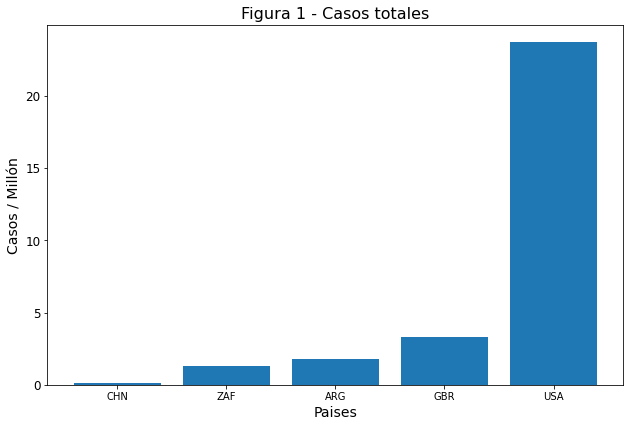

In [12]:
totales = df_final.loc[df_final.date == "2021-01-15"]   # df temporal con el total de infectados al último día del rango temporal
totales = totales.sort_values(by = ['total_cases'])     # ordenamos pot total_cases


fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
y= (totales.total_cases/1000000)
plt.bar(totales.iso_code, y)
plt.title('Figura 1 - Casos totales', size=16)
plt.xlabel("Paises", size =14)
plt.ylabel("Casos / Millón", size =14)
plt.yticks(size=12)
plt.show()

#### Figura 2: Comparados los casos totales por pais (lineas, múltiple 2x2 con el inferior completo
- Creamos listas para los casos de lso distintos paises
- Los pasamos como argumento en los métodos del plot
- Ajustamos las escalas para los paises pero mantuvimos una escala diferente para 'EEUU' ya que por tamañom poblacional no son comparables

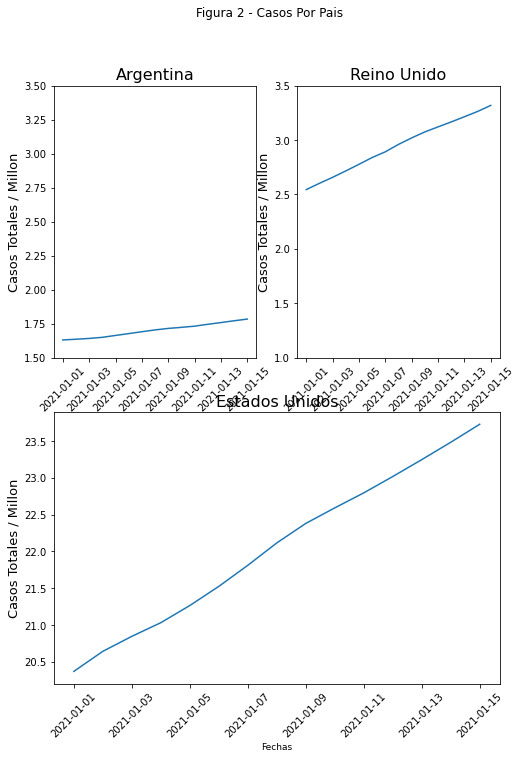

In [13]:
arg_casos_t= df_final.loc[df_final.location == "Argentina"]
usa_casos_t= df_final.loc[df_final.location == "United States"]
chn_casos_t= df_final.loc[df_final.location == "China"]
sa_casos_t= df_final.loc[df_final.location == "South Africa"]
uk_casos_t= df_final.loc[df_final.location == "United Kingdom"]

fig = plt.figure(figsize=(8,11))

gs = fig.add_gridspec(2,2)
plt.suptitle('Figura 2 - Casos Por Pais')
ax1 = fig.add_subplot(gs[0, 0])
plt.plot(arg_casos_t.date, (arg_casos_t.total_cases/1000000))
plt.title('Argentina', size = 16)
plt.xlabel('Fechas', size = 9)
plt.ylabel('Casos Totales / Millon', size = 13)
plt.xticks(rotation=45)
plt.ylim(1.5, 3.5)
#plt.yticks((1, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2))

ax2 = fig.add_subplot(gs[0, 1])
plt.plot(uk_casos_t.date, (uk_casos_t.total_cases/1000000))
plt.title('Reino Unido', size = 16)
plt.xlabel('Fechas', size = 9)
plt.ylabel('Casos Totales / Millon', size = 13)
plt.xticks(rotation=45)
plt.ylim(1.0, 3.5)
#plt.yticks((1, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2))

#plt.yticks((1, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2))

ax5 = fig.add_subplot(gs[1, :])
plt.plot(usa_casos_t.date, (usa_casos_t.total_cases/1000000))
plt.title('Estados Unidos', size = 16)
plt.xlabel('Fechas', size = 9)
plt.ylabel('Casos Totales / Millon', size = 13)
plt.xticks(rotation=45)
#plt.ylim(1.5, 3.5)
#plt.yticks((1, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2))

plt.show()

#### Figura 3: Total de Casos Nuevos y Nuevas Muertes

##### Creamos df temporales para "casos nuevos"

- Pasamos el df completo a df2
- Creamos una nueva columna que tome la proporción de casos nevos en función de la población del país.
  - EEUU y China tienen una población muy superior en números absolutos a los de Argentina, Inglaterra o Sudáfrica
- los ordenamos los datos con el método `.sort_values`por la columna `prop_casos` 



In [14]:
df2 = df_final
df2['prop_casos'] = (df2['new_cases']/df2['population'])* 100000
df2 = df2.sort_values(by = ['prop_casos'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##### Creamos la tabla de fuente de datos para el gráfico

Usamos el método `.groupoby()`por pais

In [15]:
tabla_new_cases = df2[['prop_casos', 'new_deaths','iso_code']].groupby('iso_code').sum()
tabla_new_cases = tabla_new_cases.sort_values(by = ['prop_casos'])
tabla_new_cases

,prop_casos,new_deaths
iso_code,,
CHN,0.110787,1.0
ARG,345.422996,1982.0
ZAF,423.911623,7998.0
USA,1061.640123,46994.0
GBR,1213.303058,13802.0


##### Creamos df temporales para "nuevas muertes"
- Pasamos el df completo a df2
- Creamos una nueva columna que tome la proporción de casos nevos en función de la población del país.
    - EEUU y China tienen una población muy superior en números absolutos a los de Argentina, Inglaterra o Sudáfrica
- Los ordenamos los datos con el método .sort_values)por la columna prop_casos

In [16]:
df2 = df_final
df2['prop_muertes'] = (df2['new_deaths']/df2['population'])* 100000
df2 = df2.sort_values(by = ['prop_muertes'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##### Creamos la tabla de fuente de datos para el gráfico

Usamos el método `.groupoby()`por pais

In [17]:
tabla_new_deaths = df2[['prop_muertes', 'new_deaths','iso_code']].groupby('iso_code').sum()
tabla_new_deaths = tabla_new_deaths.sort_values(by = ['prop_muertes'])
tabla_new_deaths

,prop_muertes,new_deaths
iso_code,,
CHN,0.000069,1.0
ARG,4.345936,1982.0
ZAF,13.320676,7998.0
USA,14.115912,46994.0
GBR,20.235426,13802.0


##### Creamos el gráfico
Unificamos en uno sólo gráfico con dos subplots "casos nuevos" y "nuevas muertes"

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

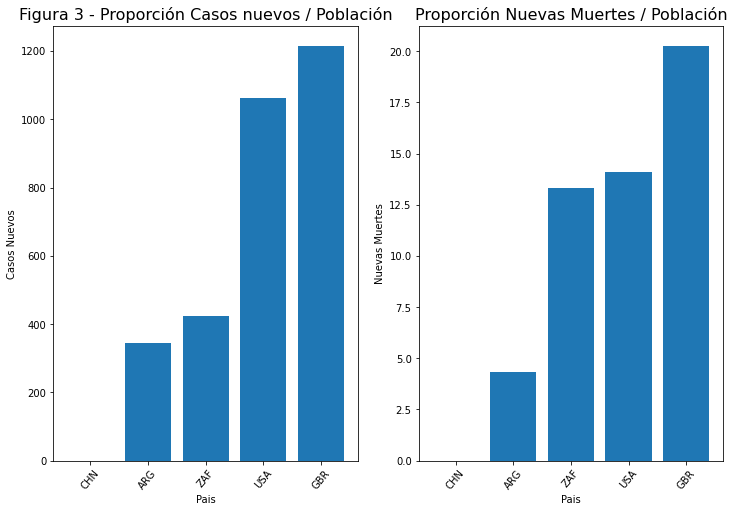

In [18]:
plt.figure(figsize=(12,8))
  
plt.subplot(121) 
plt.bar(tabla_new_cases.index, tabla_new_cases['prop_casos']) 
plt.title('Figura 3 - Proporción Casos nuevos / Población', size = 16)
plt.xlabel('Pais')
plt.ylabel('Casos Nuevos')
plt.xticks(rotation=50)
  
plt.subplot(122) 
plt.bar(tabla_new_deaths.index, tabla_new_deaths['prop_muertes'])
plt.title('Proporción Nuevas Muertes / Población', size = 16)
plt.xlabel('Pais')
plt.ylabel('Nuevas Muertes')
plt.xticks(rotation=50)

#### Figura 5: Por pais (lineas) analizamos dos variables
  - Numero de casos nuevos diarios
  - Numero de VACUNADOS
  

##### Creamos una función para poder aplicar a cualquier pais
Teniendo en cuenta que este tipo de gráfico por pais individual podria aplicarse a cualquier otro pais, es que decidimos crear esta función

- el parámetro de la función `vacunadosNuevosCasos` es el país
- Creamos la máscara con el parametro pasado desde la función
- Filtramos los NaN rellenandolos con el método .fillna(method = "bfill") que rellena para atras con el primer valor presente
- Reindexamos el df con la fecha
- Generamos el gráfico de líneas 

In [26]:
def vacunadosNuevosCasos(pais):
  maskPais = df_final["iso_code"] == pais
  casosPaisPais = df_final[maskPais]
  casosPaisPais["people_vaccinated"] = casosPaisPais["people_vaccinated"].fillna(method = "bfill")
   
  casosPaisPais = casosPaisPais.set_index("date")

  fig, ax = plt.subplots(figsize=(10,8))

  lns1 = ax.plot(casosPaisPais.index, casosPaisPais["new_cases"], color = "blue", label = "Nuevos casos")
  plt.xticks(casosPaisPais.index, rotation = 90)
  ax2 = ax.twinx()
  lns2 = ax2.plot(casosPaisPais.index, casosPaisPais["people_vaccinated"], color = "red", label = "Personas vacunadas")

  ax.set_xlabel("\n Fecha")
  ax.set_ylabel("Nuevos casos")
  ax2.set_ylabel("Personas vacunadas")
  ax.set_title("Figura 5 - Relación Nuevos Casos y Personas Vacunadas")

  lns = lns1+lns2
  labs = [l.get_label() for l in lns]
  ax.legend(lns, labs, loc = 'lower right')

  plt.show()

##### Probamos la función con un gráfico
En este caso con 'GBR'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


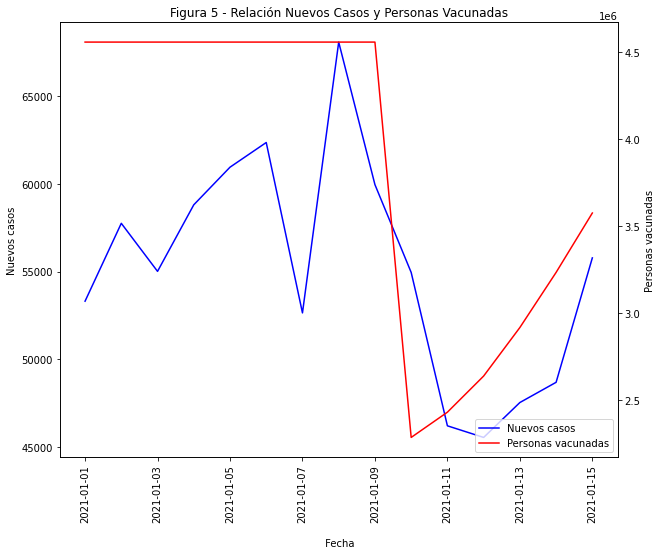

In [27]:
vacunadosNuevosCasos("GBR")

#### Figura 6: Total de UTI

Tomamos los valores 

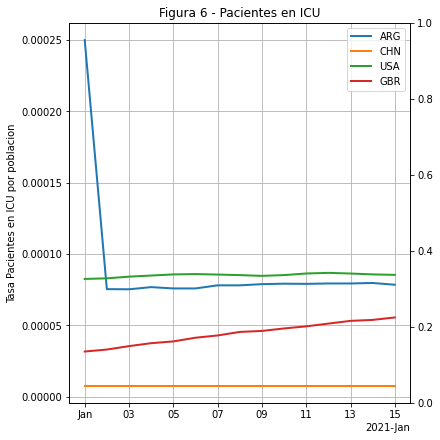

In [28]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(6,6), constrained_layout=True)

ax.twinx()

for i in ['ARG','CHN','USA','GBR']:
  x = df_final.loc[df_final['iso_code'] == i].icu_patients / df_final.loc[df_final['iso_code'] == i].population
  y = df_final.loc[df_final['iso_code'] == i].date
  ax.plot(y,x,label=i,linewidth = 2)

ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
plt.title('Figura 6 - Pacientes en ICU')
ax.grid(True)
ax.set_ylabel('Tasa Pacientes en ICU por poblacion')
ax.legend()
plt.show()

#### Figura 7: Casos según la mediana general y mayores de 65-70 años

In [29]:
tabla_median = df2[['median_age','iso_code']].groupby('iso_code').mean()
tabla_median = tabla_median.sort_values(by = ['median_age'])

In [30]:
tabla_65_70 = df2[['aged_65_older', 'aged_70_older','iso_code']].groupby('iso_code').sum()
tabla_65_70 = tabla_65_70.sort_values(by = ['aged_65_older'])

Text(0, 0.5, 'Edad Mediana Promedio')

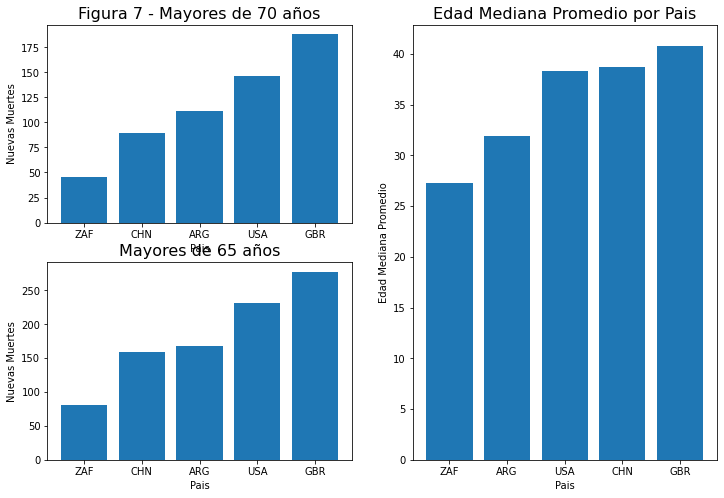

In [31]:
fig = plt.figure(figsize=(12,8))
ax = fig.subplots(nrows=2, ncols=2)

ax1 = plt.subplot2grid((2,2), (0,0)) 
plt.bar(tabla_65_70.index, tabla_65_70['aged_70_older'])
plt.title('Figura 7 - Mayores de 70 años', size = 16)
plt.xlabel('Pais')
plt.ylabel('Nuevas Muertes')


ax2 = plt.subplot2grid((2,2), (1,0))
plt.bar(tabla_65_70.index, tabla_65_70['aged_65_older'])
plt.title('Mayores de 65 años', size = 16)
plt.xlabel('Pais')
plt.ylabel('Nuevas Muertes')


ax3 = plt.subplot2grid((2,2), (0,1), rowspan=2)
plt.bar(tabla_median.index, tabla_median['median_age']) 
plt.title('Edad Mediana Promedio por Pais', size = 16)
plt.xlabel('Pais')
plt.ylabel('Edad Mediana Promedio')


---

# Paso 5: Conclusión

La pandemia de COVID-19, conocida también como pandemia de coronavirus, es una pandemia actualmente en curso derivada de la enfermedad causada por el virus SARS-CoV-2. Inicialmente fue llamada «neumonía de Wuhan», puesto que los primeros casos fueron identificados en diciembre de 2019 en la ciudad china de Wuhan,​ al reportarse casos de un grupo de personas enfermas con un tipo de neumonía desconocida. La mayoría de los afectados tenía vinculación con trabajadores del Mercado mayorista de mariscos de Huanan.​ La Organización Mundial de la Salud (OMS) la declaró una emergencia de salud pública de importancia internacional el 30 de enero de 2020 y la reconoció como una pandemia el 11 de marzo de 2020, cuando informó que había 4291 muertos y 118 000 casos en 114 países.

Analizamos lo ocurrido en la primer quincena de enero 2021 principalmente en número y evolución de los casos y estado de vacunación en una muestra que comprendió cinco países: Argentina, Estados Unidos, Inglaterra, Sudáfrica y China.





#### Número de casos


Tal como se vio en la figura 1 y, asociado a la mayor población, EEUU mostró tener la mayor cantidad de casos / millón de hab. Mientras que China prácticamente no reportó casos a pesar de haber sido el foco de inicio de la pandemia.

Todos los países (salvo China) mostraron en esos 15 dias un incremento de casos, en EEUU e Inglaterra en relación con las variantes estacionales, Sudafrica con la variante local en desarrollo y muy probablente en relación con la fiestas de fin de año ocurridas en los dias previos (figura 2).

#### Casos Nuevos y Muertes

Cuando se evalúan casos nuevos se está viendo la incidencia actual mientras que las muertes es un reflejo del impacto que tuvo la pandemia en la población que enfermó, requirió internación hospitalaria o en UTI y terminó falleciendo por la enfermedad y sus co morbilidades (Figura 4). Ponderado por la población de cada pais, vemos que el impacto de casos nuevos y enfermedad en ese periodo de tiempo se lo llevó Inglaterra y EEUU, seguido por Sudáfrica. Es interesante notar el impacto en muertes en este país ponderado por población.


#### Relación Vacunación y Casos nuevos

En este caso se compararon dos paises, Argentina e Inglaterra, con programas de vacunación en ese momento muy diferentes (figura 5). Inglaterra fue pionera en este campo y vemos que a medida que avanzó la aplicación sistemática de vacunas el número de casos tendió a disminuir. En contrapartida esta misma relación en Argentina fue más errática. 

#### Casos UTI
Conforme aumentaban los casos eso se tradujo en un aumento de pacientes que requirieron cuidados intensivos (Figura 6). 

#### Análisis por Edad
La COVID es una enfermedad que en un inicio se caracterizó por afectar a la población añosa, con el correr de las mutaciones y variantes del virus la mediana de la edad fue bajando. En la Argentina y Sudáfrica por ejemplo éstas fueron más bajas que en EEUU e Inglaterra (Figura 7).

#### Conclusión final
Este análisis nos mostró el impacto del virus SARS-CoV-2 en los distintos países seleccionados. Pudimos apreciar en cada instancia la deficiencia de los datos otorgados por el gobierno chino y su falta de compromiso a nivel global.
También se observó como la aplicación de un programa de vacunación extenso fue eficiente para reducir los casos en países como Inglaterra. 
Por último pudimos ver los efectos de la enfermedad en el sistema de salud y edad media.


---

# Paso 6: Almacenamiento de resultados

Procesamos la información ya obtenida del dataframe para almacenarla en un diccionario y almacenar el archivo.

In [ ]:
#Reseteamos el index del df
df_final.reset_index(inplace=True)
del df_final['index']

In [ ]:
#Se hace el filtrado solicitado del dataframe y se lo almacena en ID con la estructura de diccionario
dfID = df_final[['location', 'date', 'new_cases', 'new_deaths', 'total_vaccinations']]
print(dfID)
ID = dfID.to_dict(orient="list")
print(ID)

In [ ]:
#Se almacenan los datos con la estructura solicitada en un archivo CSV denominado ArchivoID
ArchivoID=pd.DataFrame(ID)
ArchivoID.to_csv("./sample_data/ArchivoID.csv")

In [22]:
df_final['result']

6644      False
6645      False
6646      False
6647      False
6648      False
          ...  
171983     True
171984     True
171985     True
171986     True
171987     True
Name: result, Length: 75, dtype: object